<a href="https://colab.research.google.com/github/grandfatherr/Hypothyroid-prediction-/blob/main/Edwin_Mutuma__Week_8_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothyroidism prediction  by The Nairobi Hospital**

##1.0 Defining the question

###1.0.1 Specifying the question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

###1.0.2 Defining the metric for success


The metric of success is if we can create a model that can correctly predict whether a patient has hypothyroidism or not based on their symptoms and the results of a couple of tests ran.

###1.0.3 Understanding the context


Nairobi Hospital prides itself in being a leading healthcare provider not only in Kenya but in the East and Central Africa region boasting of expert physician specialists and caring staff. 

All this in an effort aimed at providing its patients with an exceptional health care experience. With that in mind, it is vital for the institution to aways stay ahead of the other healthcare providers in the region by maintaining high healthcare standards to its patients by correctly diagnosing patients and offering solutions to the ailments of the patients who turn to them fir treatment. 

An accurate model can greatly reduce the risk of misdiagnosis and is therefore imperative that this model is not only accurate but precise in its classifications

###1.0.4 Recording the experimental design


Data importation

Data Reading & Cleaning

EDA

Feature Engineering

Model Building

        Decision trees
        Support Vector Machine

Evaluating/Assessing Model

Prediction

###1.0.5 Data relevance



Evaluated against the metric of success after implementation of solution

##1.1 Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/hypothyroid.csv')
df1 = df.copy()

##1.2 Checking the data

In [2]:
# Checking the top of our data
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# Look at the bottom of the data
df.tail(15)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3148,negative,58,F,f,f,f,f,f,t,f,f,f,f,f,y,1.20,y,1.90,y,90,y,1.06,y,85,n,?
3149,negative,?,?,f,f,f,f,f,f,f,f,f,f,f,y,2.90,y,2,y,118,y,1.04,y,113,n,?
3150,negative,15,M,f,f,f,f,f,t,f,f,f,f,f,n,?,n,?,y,188,y,0.73,y,258,n,?
3151,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,0.30,y,3.10,y,151,y,1.40,y,108,n,?
3152,negative,33,F,t,f,f,f,t,f,f,f,f,f,f,n,?,n,?,y,104,y,1.01,y,103,n,?
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.70,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.10,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.40,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.10,y,1.20,y,76,y,0.90,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.60,y,1.80,y,126,y,1.02,y,124,n,?


In [4]:
# Generating a random sample from the data
df.sample(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
445,negative,70,F,f,f,f,f,t,f,f,f,f,f,f,y,0,y,1.90,y,136,y,0.94,y,144,n,?
477,negative,33,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,93,y,0.97,y,96,n,?
584,negative,36,F,f,f,f,f,t,t,f,f,f,f,f,y,1.50,y,2.40,y,90,y,1.06,y,85,n,?
2513,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.20,y,2,y,148,y,0.99,y,149,n,?
152,negative,72,M,f,f,f,f,f,f,f,f,f,f,f,n,?,y,1,y,83,y,0.95,y,87,n,?


In [5]:
# Check the datatypes in our dataset
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [6]:
# Check the number of records in our dataset
df.shape

(3163, 26)

##1.3 Cleaning the data

In [7]:
#converting numerical cols 
df.age = pd.to_numeric(df.age, errors='coerce')
df.TSH = pd.to_numeric(df.TSH, errors='coerce')
df.T3 = pd.to_numeric(df.T3, errors='coerce')
df.TT4 = pd.to_numeric(df.TT4, errors='coerce')
df.T4U = pd.to_numeric(df.T4U, errors='coerce')
df.FTI = pd.to_numeric(df.FTI, errors='coerce')
df.TBG = pd.to_numeric(df.TBG, errors='coerce')

In [8]:
# Replace the ? mark with a null value
df = df.replace(['?'], np.nan)

In [9]:
# Checking for the completeness of data
df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [10]:
# Dealing with the missing values
df.age.fillna(df.age.mean(), inplace=True)
df.sex.dropna(inplace=True)
df.drop(['TBG'], axis=1, inplace=True)

In [11]:
df.isna().sum()

status                         0
age                            0
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

In [12]:
# Dropping the null values 
df.dropna(how='any', inplace=True)

In [13]:
# Check to see whether we have dropped the nuill values
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [14]:
# Let us look at the shape of our dataframe after dealing with the null values
df.shape

(2338, 25)

In [15]:
# Checking for the consistency in data
df.duplicated().sum()

59

In [16]:
# Checking the duplicated
df[df.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
53,hypothyroid,69.000000,F,f,f,f,f,f,f,f,f,f,f,f,y,21.00,y,0.8,y,53.0,y,0.86,y,61.0,n
66,hypothyroid,62.000000,M,f,f,f,f,f,f,f,f,f,f,f,y,100.00,y,0.4,y,10.0,y,1.00,y,10.0,n
124,hypothyroid,77.000000,F,f,f,f,f,f,f,f,f,f,f,f,y,23.00,y,0.5,y,33.0,y,0.67,y,49.0,n
128,hypothyroid,79.000000,F,f,f,f,f,f,f,f,f,f,f,f,y,29.00,y,1.6,y,47.0,y,0.97,y,48.0,n
132,hypothyroid,85.000000,F,f,f,f,f,t,f,f,f,f,f,f,y,7.30,y,2.4,y,66.0,y,1.09,y,61.0,n
135,hypothyroid,24.000000,F,f,f,f,f,f,f,f,f,f,f,f,y,65.00,y,0.7,y,28.0,y,1.00,y,28.0,n
138,hypothyroid,15.000000,F,t,f,f,f,f,f,f,f,f,f,t,y,35.00,y,2.0,y,19.0,y,0.95,y,20.0,n
145,hypothyroid,60.000000,F,f,f,f,f,f,f,f,f,f,f,t,y,12.00,y,2.2,y,71.0,y,1.40,y,51.0,n
146,hypothyroid,78.000000,F,f,f,f,f,f,f,f,f,f,f,f,y,28.00,y,0.2,y,17.0,y,1.01,y,16.0,n
334,negative,73.000000,F,t,f,f,f,t,f,f,f,f,f,f,y,11.00,y,1.3,y,80.0,y,0.95,y,85.0,n


The duplicated values aren't really duplicates in our data so we are not going to drop them.

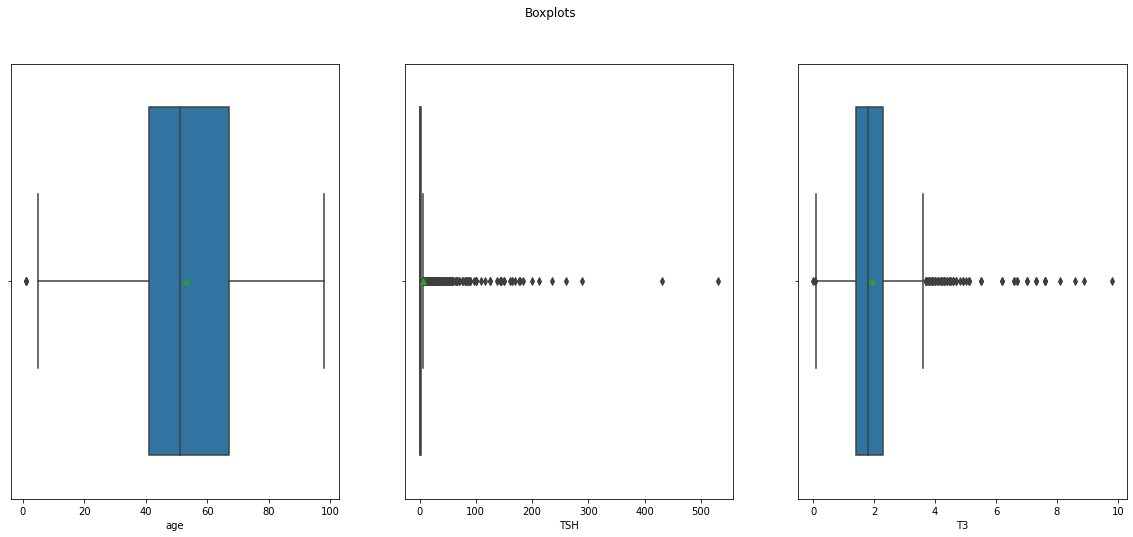

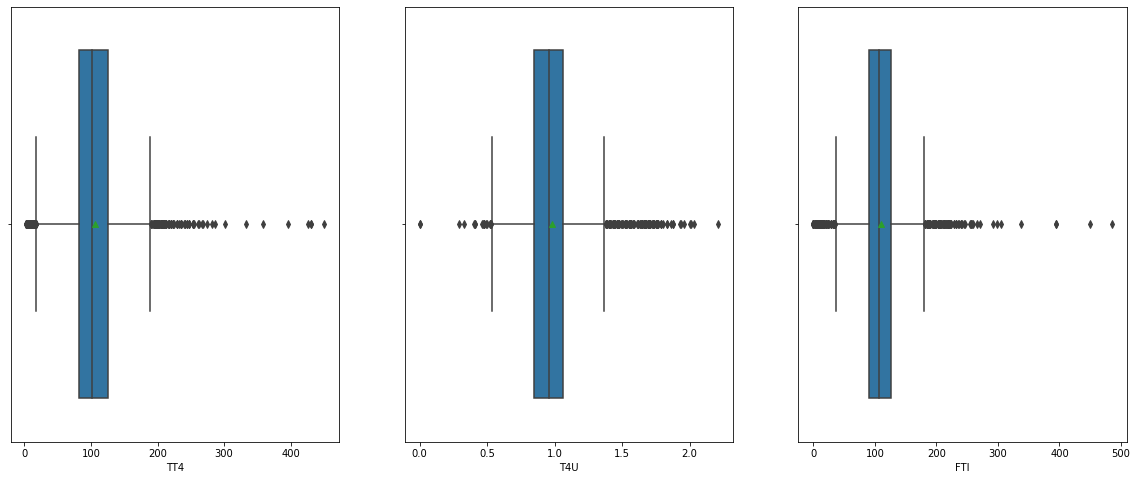

In [17]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = df['age'], ax=ax1, showmeans = True)
sns.boxplot(x = df['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = df['T3'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 8))
sns.boxplot(x = df['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = df['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x = df['FTI'], ax=ax6, showmeans = True)
plt.show()

##1.4 Exploratory data analysis

###1.4.1 Univariate analysis

In [18]:
# Check the summary stats for our data
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,53.265665,6.003700,1.913345,106.645552,0.983037,109.938580
std,17.873318,24.572168,0.952338,44.263718,0.226437,40.849049
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,41.000000,0.000000,1.400000,82.000000,0.850000,90.000000
50%,51.154214,0.700000,1.800000,102.000000,0.960000,107.000000
75%,67.000000,2.200000,2.300000,125.000000,1.060000,126.000000
max,98.000000,530.000000,9.800000,450.000000,2.210000,485.000000


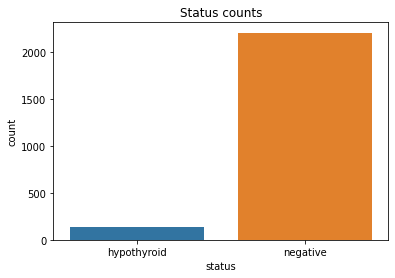

In [19]:
#Count plots
sns.countplot(x=df['status'])
plt.title('Status counts')
plt.show()

In [20]:
df['sex'].value_counts()

F    1594
M     744
Name: sex, dtype: int64

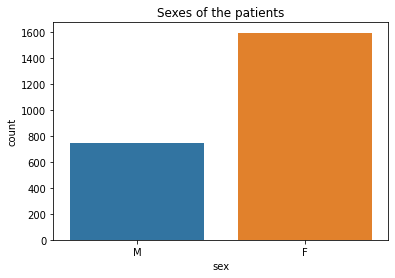

In [21]:
#Count plots
sns.countplot(x=df['sex'])
plt.title('Sexes of the patients')
plt.show()

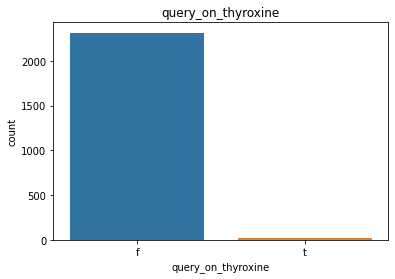

In [22]:
#Count plots
sns.countplot(x=df['query_on_thyroxine'])
plt.title('query_on_thyroxine')
plt.show()

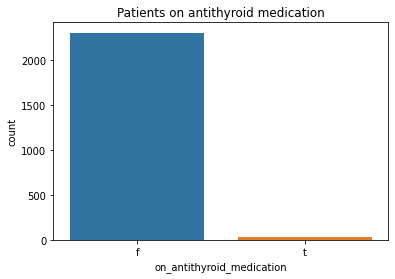

In [23]:
#Count plots
sns.countplot(x=df['on_antithyroid_medication'])
plt.title('Patients on antithyroid medication')
plt.show()

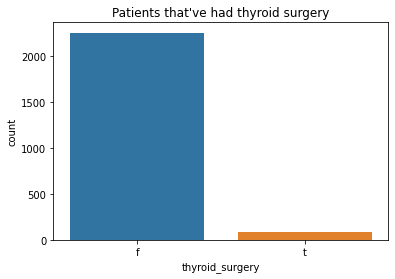

In [24]:
#Count plots
sns.countplot(x=df['thyroid_surgery'])
plt.title('Patients that\'ve had thyroid surgery')
plt.show()

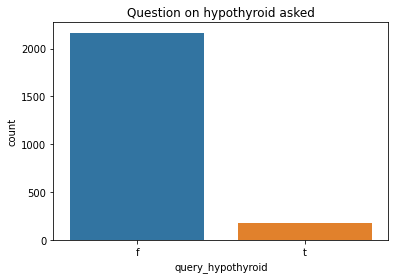

In [25]:
#Count plots
sns.countplot(x=df['query_hypothyroid'])
plt.title('Question on hypothyroid asked')
plt.show()

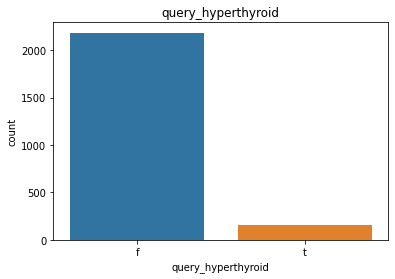

In [26]:
#Count plots
sns.countplot(x='query_hyperthyroid',data=df)
plt.title('query_hyperthyroid')
plt.show()

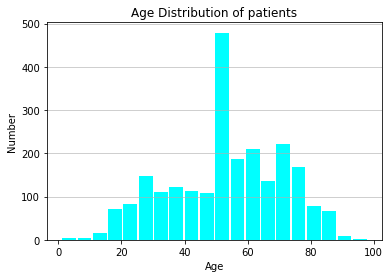

In [27]:
#Plotting a histogram to show the age ditribution
df.age.plot.hist(grid=False, bins=20, rwidth=0.9,
                   color='cyan')
plt.title('Age Distribution of patients')
plt.xlabel('Age')
plt.ylabel('Number')
plt.grid(axis='y', alpha=0.75)

In [28]:
df['pregnant'].value_counts()

f    2286
t      52
Name: pregnant, dtype: int64

###1.4.2 Bivariate analysis

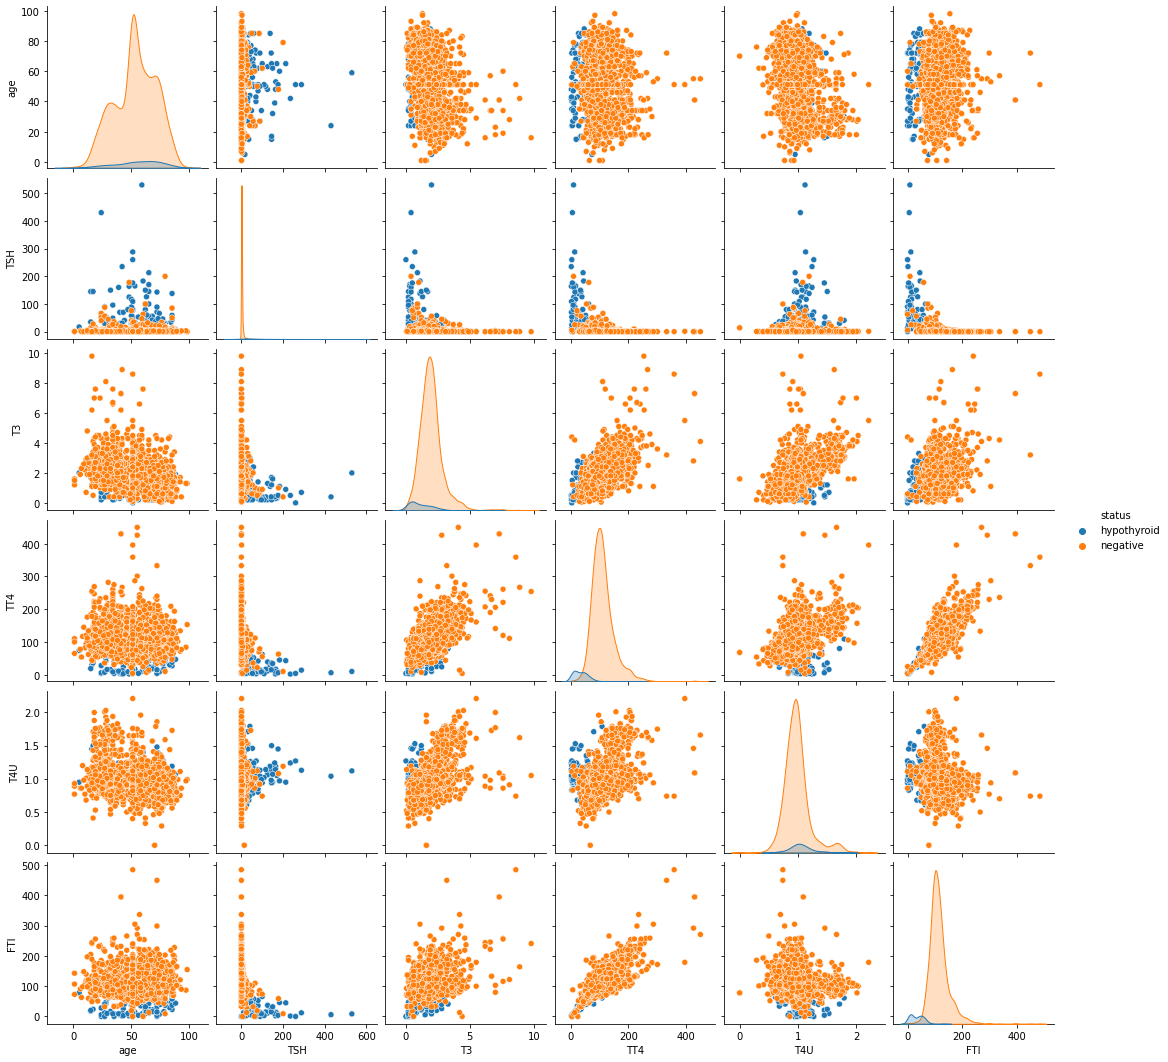

In [29]:
# Plot the various pairplots
sns.pairplot(df, hue='status')
plt.show()

In [30]:
# Checking the correlations in our data
df.corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.002725,-0.323034,-0.114133,-0.233254,0.025477
TSH,-0.002725,1.000000,-0.195796,-0.328580,0.070334,-0.378336
T3,-0.323034,-0.195796,1.000000,0.594315,0.483913,0.348460
TT4,-0.114133,-0.328580,0.594315,1.000000,0.416338,0.810665
T4U,-0.233254,0.070334,0.483913,0.416338,1.000000,-0.140761
FTI,0.025477,-0.378336,0.348460,0.810665,-0.140761,1.000000


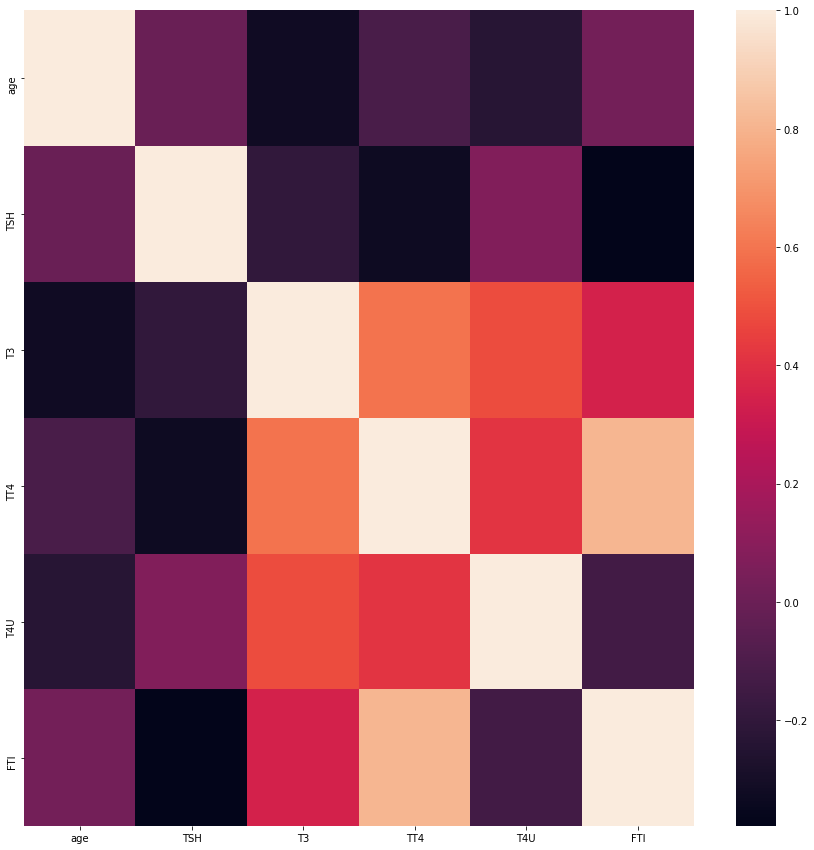

In [31]:
#Plotting a heatmap for correlation visualization

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = False)
plt.show()

###1.4.3 Multivariate analysis

In [32]:
#Encoding the categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['status'] = le.fit_transform(df['status'])
df['sex'] = le.fit_transform(df['sex'])
df['on_thyroxine'] = le.fit_transform(df['on_thyroxine'])
df['query_on_thyroxine'] = le.fit_transform(df['query_on_thyroxine'])
df['on_antithyroid_medication'] = le.fit_transform(df['on_antithyroid_medication'])
df['thyroid_surgery'] = le.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid'] = le.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid'] = le.fit_transform(df['query_hyperthyroid'])
df['pregnant'] = le.fit_transform(df['pregnant'])
df['sick'] = le.fit_transform(df['sick'])
df['tumor'] = le.fit_transform(df['tumor'])
df['lithium'] = le.fit_transform(df['lithium'])
df['goitre'] = le.fit_transform(df['goitre'])
df['TSH_measured'] = le.fit_transform(df['TSH_measured'])
df['T3_measured'] = le.fit_transform(df['T3_measured'])
df['TT4_measured'] = le.fit_transform(df['TT4_measured'])
df['T4U_measured'] = le.fit_transform(df['T4U_measured'])
df['FTI_measured'] = le.fit_transform(df['FTI_measured'])
df['TBG_measured'] = le.fit_transform(df['TBG_measured'])

In [33]:
# Separating our target label (type) from the other features
feat = df.drop(['status'], 1)
type_label = df['status']

In [34]:
# Subject our features to LDA model
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda = lda.fit(feat, type_label)
lda_feat = lda.transform(feat)

In [35]:
# Display the coeficients of the reduced columns
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
lithium,3.654339e+00
pregnant,1.403556e+00
on_antithyroid_medication,1.217854e+00
tumor,1.178756e+00
sick,1.007264e+00
query_on_thyroxine,7.270951e-01
sex,2.149534e-01
TT4,6.043975e-02
T3,1.014113e-02
TSH_measured,6.763155e-16


##1.5 Implementing the solution

###1.5.1 Baseline model (Decision Trees)

In [36]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [37]:
#Let's use decision trees as our baseline model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if a patient's symptoms indicate that they have hypothyroid, so let's use that column as our Y 

y = df['status'].values

test_features = ['sex', 'age', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
                       
X = df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Create a decision tree classifier

tree = DecisionTreeClassifier(max_depth=5,min_samples_split = 20)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

# Checking the accuracy of the decision tree model
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.98005698005698


In [39]:
print('MAE Tree:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE Tree:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE Tree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE Tree: 0.019943019943019943
MSE Tree: 0.019943019943019943
RMSE Tree: 0.14121975762272057


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


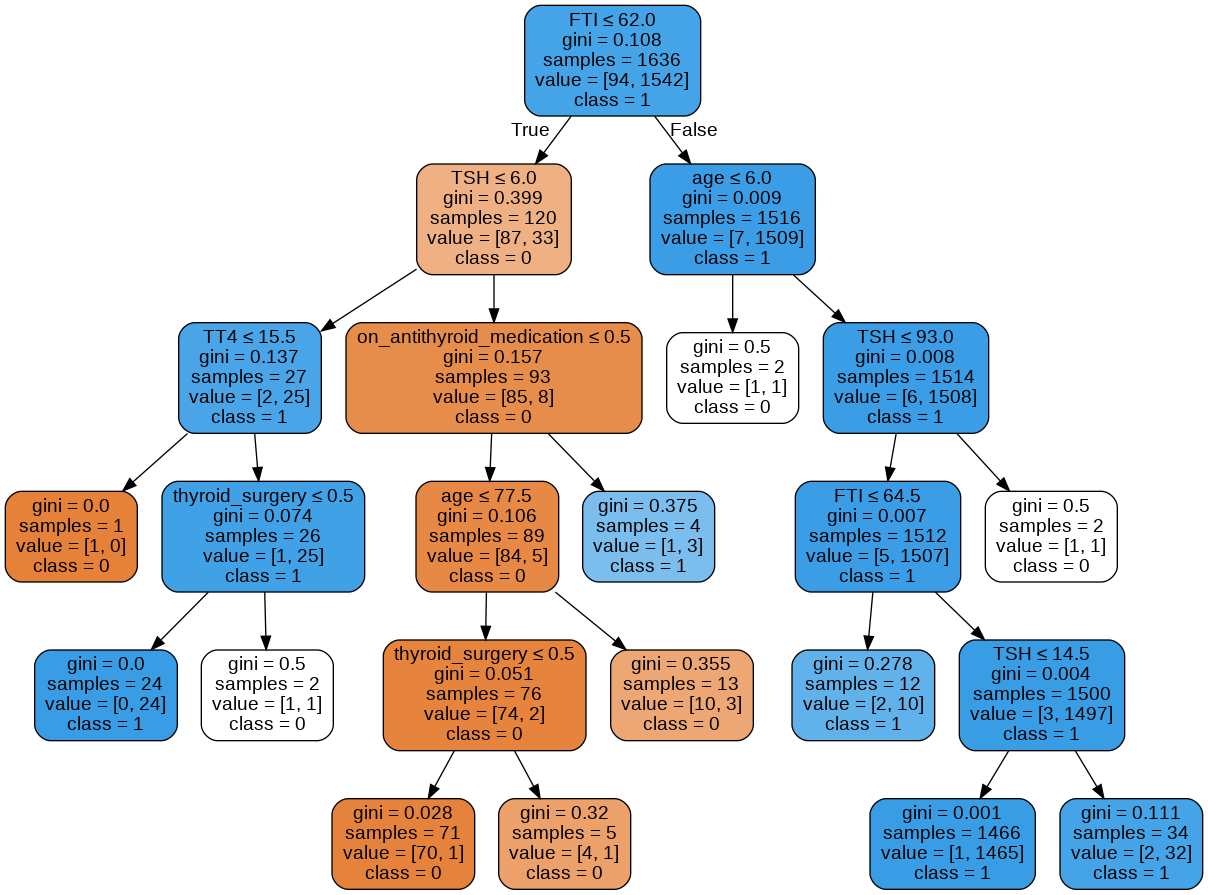

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypo decision tree.png')
Image(graph.create_png())

###1.5.2 Random Forest Classification.

In [41]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict one's hypothyroid status, so let's use that column as our Y  

y = df['status'].values

test_features = df.columns.to_list()
test_features.remove('status')

X = df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.

rf_mod = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
rf_mod = rf_mod.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rf_mod.predict(X_test)

print('accuracy_score:',metrics.accuracy_score(y_test, y_pred))
print('***************')
print('MAE RF:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE RF:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE RF:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy_score: 0.98005698005698
***************
MAE RF: 0.019943019943019943
MSE RF: 0.019943019943019943
RMSE RF: 0.14121975762272057


In [43]:
# Get numerical feature importances
importances = list(rf_mod.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.016), ('sex', 0.002), ('on_thyroxine', 0.003), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.003), ('thyroid_surgery', 0.002), ('query_hypothyroid', 0.004), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.005), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.002), ('TSH_measured', 0.0), ('TSH', 0.274), ('T3_measured', 0.0), ('T3', 0.075), ('TT4_measured', 0.0), ('TT4', 0.293), ('T4U_measured', 0.0), ('T4U', 0.027), ('FTI_measured', 0.0), ('FTI', 0.284), ('TBG_measured', 0.009)]

Variable: TT4                  Importance: 0.293
Variable: FTI                  Importance: 0.284
Variable: TSH                  Importance: 0.274
Variable: T3                   Importance: 0.075
Variable: T4U                  Importance: 0.027
Variable: age                  Importance: 0.016
Variable: TBG_measured         Importance: 0.009
Variable: sick                 Importance: 0.005
Variable: query_hypothyroid    Importance: 0.004
Variable: on_thyroxine         Importan

In classifying whether a patient has hypothyroid or not, we only need those features that have a relatively high importance.

#### Hyperparameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

cv_rf = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                    

In [45]:
# Getting the best parameters
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [46]:
# Model using the best parameters
rf_mod = RandomForestClassifier(n_estimators = 500, random_state=42, min_samples_split = 20, 
                                max_features= 'auto', max_depth=7, criterion='entropy')
rf_mod = rf_mod.fit(X_train, y_train)

In [47]:
# Predict based on the model we've trained
y_pred = rf_mod.predict(X_test)

print('accuracy_score:',metrics.accuracy_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy_score: 0.9829059829059829
Mean Absolute Error: 0.017094017094017096
Mean Squared Error: 0.017094017094017096
Root Mean Squared Error: 0.1307440900921227


After tuning the parameters for our random forest model we achieve a slightly better accuracy than we had in the untuned model. We achieve an accuracy score of 98.29% over the previous 98% and has the least RMSE

###1.5.3 AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier()
ada=AdaBoostClassifier()
search_grid={'n_estimators':[100,200,300],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)
search.fit(X_train,y_train)
search.best_params_


{'learning_rate': 0.01, 'n_estimators': 200}

#### Hyperparameter tuning Adaboost

In [49]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=200, learning_rate=0.01, random_state=5)
ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

# Check the accuracy of our boosted model
print('accuracy_score:',metrics.accuracy_score (y_test , y_pred_ada))

print('***************')

print('MAE Ada:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE Ada:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE Ada:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy_score: 0.9829059829059829
***************
MAE Ada: 0.017094017094017096
MSE Ada: 0.017094017094017096
RMSE Ada: 0.1307440900921227


After boosting our model using AdaBoost, we achieve an accuracy of 98.29% and a RMSE of 0.130

###1.5.4 Support Vector Machine

####a) Linear kernel

In [50]:
# We'll need to reduce the features. 
# We shall use the two most important features from our decision trees

x = df[['TT4', 'FTI']].values
y = df.status

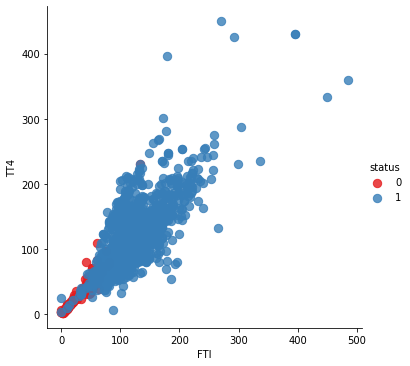

In [51]:
# Plot the two features
sns.lmplot(x='FTI', y= 'TT4', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()


In [52]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [53]:
from sklearn.svm import SVC

# Fit the model
l_svm = SVC(kernel= 'linear')
svm_model = l_svm.fit(X_train,y_train)

In [54]:
# making prediction
y_pred_linear = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Model Evaluation
print( accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))


0.9764957264957265
[[ 18   9]
 [  2 439]]


After using linear kernel for our SVM model, we achieve an accuracy of 97.65% 

####b) Polynomial kernel

In [55]:
# Building the model 

#polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
#polyclassifier.fit(X_train, y_train)

In [56]:
# making prediction
#y_pred = polyclassifier.predict(X_test)

In [57]:
# Model Evaluation
#print( accuracy_score(y_test, y_pred)*100)
#print(confusion_matrix(y_test, y_pred)

#print('MAE Poly:', metrics.mean_absolute_error(y_test, y_pred))  
#print('MSE Poly:', metrics.mean_squared_error(y_test, y_pred))  
#print('RMSE Poly:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

After using polynomial kernel for our SVM model, we achieve an accuracy of 97.22%

####c) RBF Kernel

In [58]:
# Building the model 

rbf = SVC(kernel='rbf')
# Training the model using the training set
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
# making prediction
y_pred = rbf.predict(X_test)

# Evaluation the performance of our model
print( accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print('\n')
print('***************')
print('\n')
print('MAE rbf:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE rbf:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE rbf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

97.22222222222221
[[ 18   9]
 [  4 437]]


***************


MAE rbf: 0.027777777777777776
MSE rbf: 0.027777777777777776
RMSE rbf: 0.16666666666666666


After using rbf kernel for our SVM model, we achieve an accuracy of 97.22%

##1.6 Challenging the solution

In [60]:
# Split the independent and dependent variables
# We want to predict one's hypothyroid status, so let's use that column as our Y 
y = df['status'].values

#We will use all the other features in this model.

test_features = df.columns.to_list()
test_features.remove('status')

X = df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
# Building the model 

rbfclassifier = SVC(kernel='linear')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [63]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9700854700854701
[[ 26  15]
 [  6 655]]
Mean Absolute Error: 0.029914529914529916
Mean Squared Error: 0.029914529914529916
Root Mean Squared Error: 0.17295817388759027


The accuracy when using all the features and linear kernel reduced the accuracy of the model from 97.65% to 97%

##1.7 Conclusions

Being a problem that will involve the lives of individuals, we require a very high accuracy for our model. As such, the model that gave us the best accuracy is adaboost so ensemble learning using Adaptive boosting is the most ideal in modelling for this data

##9.0 Follow up Questions

###a)Did we have the right data?

Yes we did. It included different sypmtoms that were relevant for our project.  The data provided was sufficient to perform classification

###b)Do we need other data to answer our question?

Not quite. The data provided here was quite helpful. However, if we could get more data on features that are more important, we could check whether that will affect the accuracy of our model.

###c)Did we have the right question?

Yes. Based on our data and the research problem of The Nairobi Hospital, we had asked the right question.